In [5]:
# Import libraries
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load dataset
df = pd.read_csv("Cleaned-amazon-Dataset.csv")

In [10]:
# Get Top 15 categories
top_categories = df['category'].value_counts().nlargest(15).index

In [11]:
# Filter dataset to only Top 15 categories
df_top15 = df[df['category'].isin(top_categories)]

In [12]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    if pd.isnull(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity

# Apply sentiment analysis on 'review_content'
df_top15['sentiment_score'] = df_top15['review_content'].apply(get_sentiment)

# Classify sentiment based on polarity score
def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df_top15['sentiment'] = df_top15['sentiment_score'].apply(classify_sentiment)

# Check result sample
print(df_top15[['category', 'review_content', 'sentiment_score', 'sentiment']].head())


    category                                     review_content  \
0  USBCables  Looks durable Charging is fine tooNo complains...   
1  USBCables  I ordered this cable to connect my phone to An...   
2  USBCables  Not quite durable and sturdy,https://m.media-a...   
3  USBCables  Good product,long wire,Charges good,Nice,I bou...   
4  USBCables  Bought this instead of original apple, does th...   

   sentiment_score sentiment  
0         0.481944  Positive  
1         0.274318  Positive  
2         0.600000  Positive  
3         0.240370  Positive  
4         0.262740  Positive  


C:\Users\bedab\AppData\Local\Temp\ipykernel_19740\3850041777.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top15['sentiment_score'] = df_top15['review_content'].apply(get_sentiment)
C:\Users\bedab\AppData\Local\Temp\ipykernel_19740\3850041777.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top15['sentiment'] = df_top15['sentiment_score'].apply(classify_sentiment)


#  Visualize Sentiment Distribution (for Top 15 Categories)

C:\Users\bedab\AppData\Local\Temp\ipykernel_19740\1901374664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df_top15, palette='pastel')


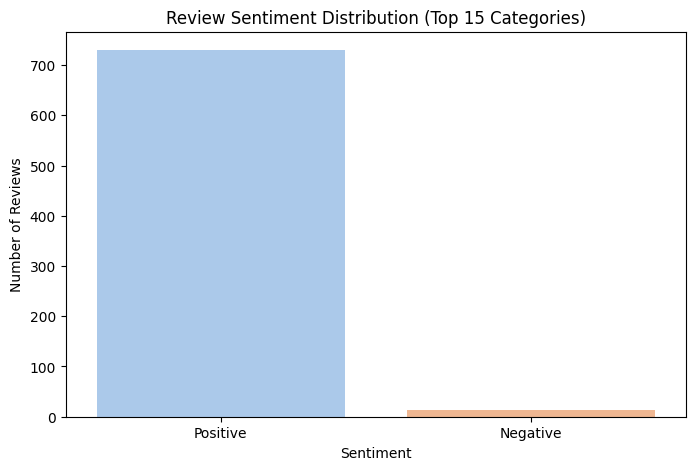

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=df_top15, palette='pastel')
plt.title('Review Sentiment Distribution (Top 15 Categories)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Average Sentiment per Category (Top 15)

C:\Users\bedab\AppData\Local\Temp\ipykernel_19740\2613852403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='viridis')


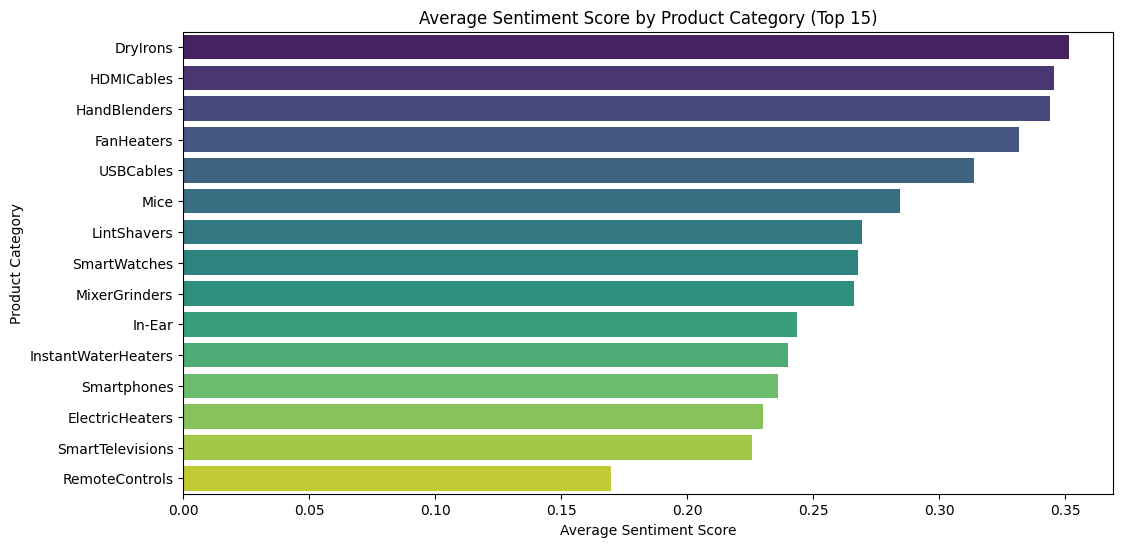

In [14]:
category_sentiment = df_top15.groupby('category')['sentiment_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=category_sentiment.values, y=category_sentiment.index, palette='viridis')
plt.title('Average Sentiment Score by Product Category (Top 15)')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Product Category')
plt.show()